In [2]:
import numpy as np
import pandas as pd 
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
assets = ['MNKD', 'ECYT']
pf_data = pd.DataFrame()

for a in assets:
    pf_data[a] = wb.DataReader(a, data_source= 'yahoo', start='2017-1-1')['Adj Close']

In [5]:
pf_data.tail()

,MNKD,ECYT
Date,,
2017-11-02,3.23,4.71
2017-11-03,3.26,5.01
2017-11-06,3.23,4.84
2017-11-07,3.25,4.66
2017-11-08,3.00,4.74


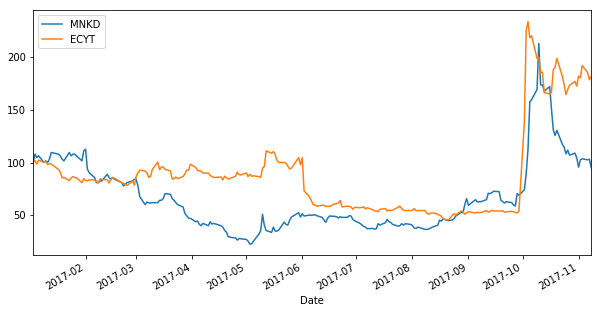

In [7]:
(pf_data / pf_data.iloc[0] * 100).plot(figsize=(10,5))

In [8]:
log_returns = np.log(pf_data / pf_data.shift(1))

In [10]:
log_returns.mean()*250

MNKD   -0.056733
ECYT    0.693822
dtype: float64

In [11]:
log_returns.cov()*250

,MNKD,ECYT
MNKD,1.443026,0.211778
ECYT,0.211778,1.816941


In [12]:
log_returns.corr()

,MNKD,ECYT
MNKD,1.00000,0.13079
ECYT,0.13079,1.00000


In [13]:
num_assets = len(assets)

In [19]:
arr = np.random.random(2)

In [20]:
arr[0] + arr[1]

0.79552596373832296

In [22]:
weights = np.random.random(num_assets)
weights /= np.sum(weights)
weights

array([ 0.55456234,  0.44543766])

In [23]:
weights[0] + weights[1]

1.0

In [24]:
# Calculate the expected returns
np.sum(weights * log_returns.mean())*250

0.27759259977493117

In [25]:
# Calculate the expected portfolio variance
np.dot(weights.T,np.dot(log_returns.cov()* 250, weights))

0.90892347446489763

In [26]:
# Calculate the expected portfolio volatility
np.sqrt(np.dot(weights.T,np.dot(log_returns.cov()*250, weights)))

0.95337478174372625

In [30]:
# Simulate various portfolios
pfolio_returns = []
pfolio_volatilities = []

for x in range(1000):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    pfolio_returns.append(np.sum(weights *log_returns.mean() ) * 250)
    pfolio_volatilities.append(np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights))))
    
pfolio_returns = np.array(pfolio_returns)
pfolio_volatilities = np.array(pfolio_volatilities)
pfolio_returns, pfolio_volatilities

(array([ 0.31704158,  0.49639184,  0.55991938,  0.64605314,  0.1177808 ,
         0.32597178,  0.5620393 ,  0.11908429,  0.30109801,  0.1724892 ,
         0.33133928,  0.10207825,  0.19419332,  0.0720851 ,  0.41114764,
         0.35296916,  0.02565877,  0.08254918,  0.46593835,  0.52632907,
         0.20547723,  0.1036234 ,  0.33040868,  0.21114131,  0.21512776,
         0.28205556,  0.27898744,  0.27494198,  0.47101573,  0.07382406,
         0.23320664,  0.63365108,  0.44326874,  0.34786408,  0.23398672,
        -0.00366611,  0.51040649,  0.05408233,  0.52030743,  0.32639814,
         0.62167997,  0.28646572,  0.5280975 ,  0.18927898,  0.3644154 ,
         0.49924148,  0.52530476, -0.02299957,  0.38139233,  0.46839592,
        -0.03867698,  0.24854568,  0.37730421,  0.5239118 ,  0.58929171,
         0.22511486,  0.30279327,  0.10842455,  0.25124445, -0.02745029,
         0.27044614,  0.20715087,  0.4692826 ,  0.45280059,  0.41790276,
         0.01650798,  0.25954538,  0.30568145,  0.5

In [31]:
portfolios = pd.DataFrame({'Return': pfolio_returns, 'Volatility': pfolio_volatilities})

In [32]:
portfolios.head()

,Return,Volatility
0,0.317042,0.959241
1,0.496392,1.081082
2,0.559919,1.155198
3,0.646053,1.274406
4,0.117781,1.011834


In [33]:
portfolios.tail()

,Return,Volatility
995,0.290133,0.954354
996,0.340043,0.966395
997,0.236659,0.955954
998,0.460394,1.045399
999,0.255678,0.953657


Text(0,0.5,'Expected Return')

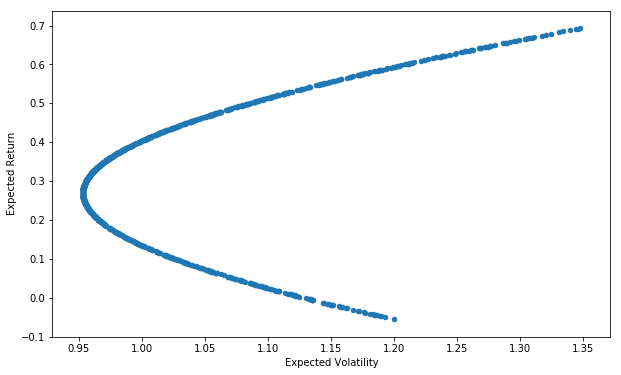

In [34]:
portfolios.plot(x='Volatility', y='Return', kind='scatter', figsize=(10,6))
plt.xlabel('Expected Volatility')
plt.ylabel('Expected Return')